In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
spam = pd.read_csv('spam.csv', encoding='latin-1')

In [11]:
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [13]:
spam.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [14]:
spam.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [15]:
spam.count()

v1            5572
v2            5572
Unnamed: 2      50
Unnamed: 3      12
Unnamed: 4       6
dtype: int64

In [18]:
spam.shape

(5572, 5)

In [25]:
spam.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [26]:
spam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
li = [['ham','spam']]

In [29]:
oe = OrdinalEncoder(categories=li)  # Note the extra brackets around li
oe.fit(spam[['v1']])

,categories,"[['ham', 'spam']]"
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,unknown_value,None
,encoded_missing_value,nan
,min_frequency,None
,max_categories,None


In [30]:
spam['label'] = oe.transform(spam[['v1']])
spam

,v1,v2,label
0,ham,"Go until jurong point, crazy.. Available only ...",0.0
1,ham,Ok lar... Joking wif u oni...,0.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1.0
3,ham,U dun say so early hor... U c already then say...,0.0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0.0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1.0
5568,ham,Will Ì_ b going to esplanade fr home?,0.0
5569,ham,"Pity, * was in mood for that. So...any other s...",0.0
5570,ham,The guy did some bitching but I acted like i'd...,0.0


In [31]:
spam.drop(columns=['v1'], inplace=True)

In [32]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   v2      5572 non-null   object 
 1   label   5572 non-null   float64
dtypes: float64(1), object(1)
memory usage: 87.2+ KB


In [33]:
spam.isnull().sum()

v2       0
label    0
dtype: int64

In [35]:
# For Text processing 
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

In [36]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')  # You likely need this for word_tokenize as well
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /home/hp/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/hp/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/hp/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [41]:
stop_words = set(stopwords.words('english')) 
spam['v2'] = spam['v2'].apply(lambda x: ' '.join([ 
    word for word in word_tokenize(x)  
    if not word in stop_words]
))

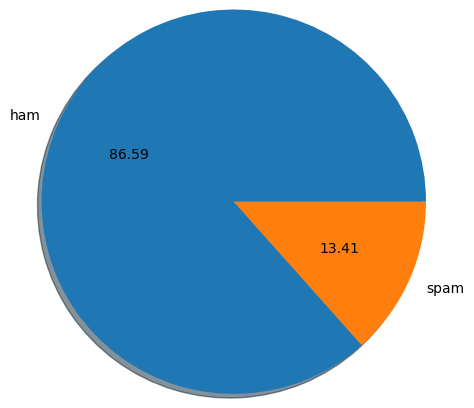

In [63]:
plt.pie(spam['label'].value_counts(),labels = ['ham', 'spam'], autopct = "%.2f",shadow = True, radius= 1.3,labeldistance = 1.1)
plt.show()

In [65]:
X = spam.loc[:,'v2']
Y = spam['label'].values

In [67]:
cv=CountVectorizer()
X=cv.fit_transform(X).toarray()

In [69]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [127]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 39)

In [96]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [97]:
lr.score(X_train, Y_train)*100,lr.score(X_test, Y_test)*100

(99.73076060130133, 97.21973094170404)

In [99]:
Y_pred = lr.predict(X_test)

In [142]:
confusion_matrix(Y_test,Y_pred)

array([[924,  11],
       [ 27, 153]])

In [135]:
dfc = DecisionTreeClassifier(criterion = 'entropy')
dfc.fit(X_train, Y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [136]:
dfc.score(X_train, Y_train)*100,lr.score(X_test, Y_test)*100

(100.0, 97.21973094170404)

In [137]:
Y_pred = dfc.predict(X_test)

In [138]:
confusion_matrix(Y_test,Y_pred)

array([[924,  11],
       [ 27, 153]])

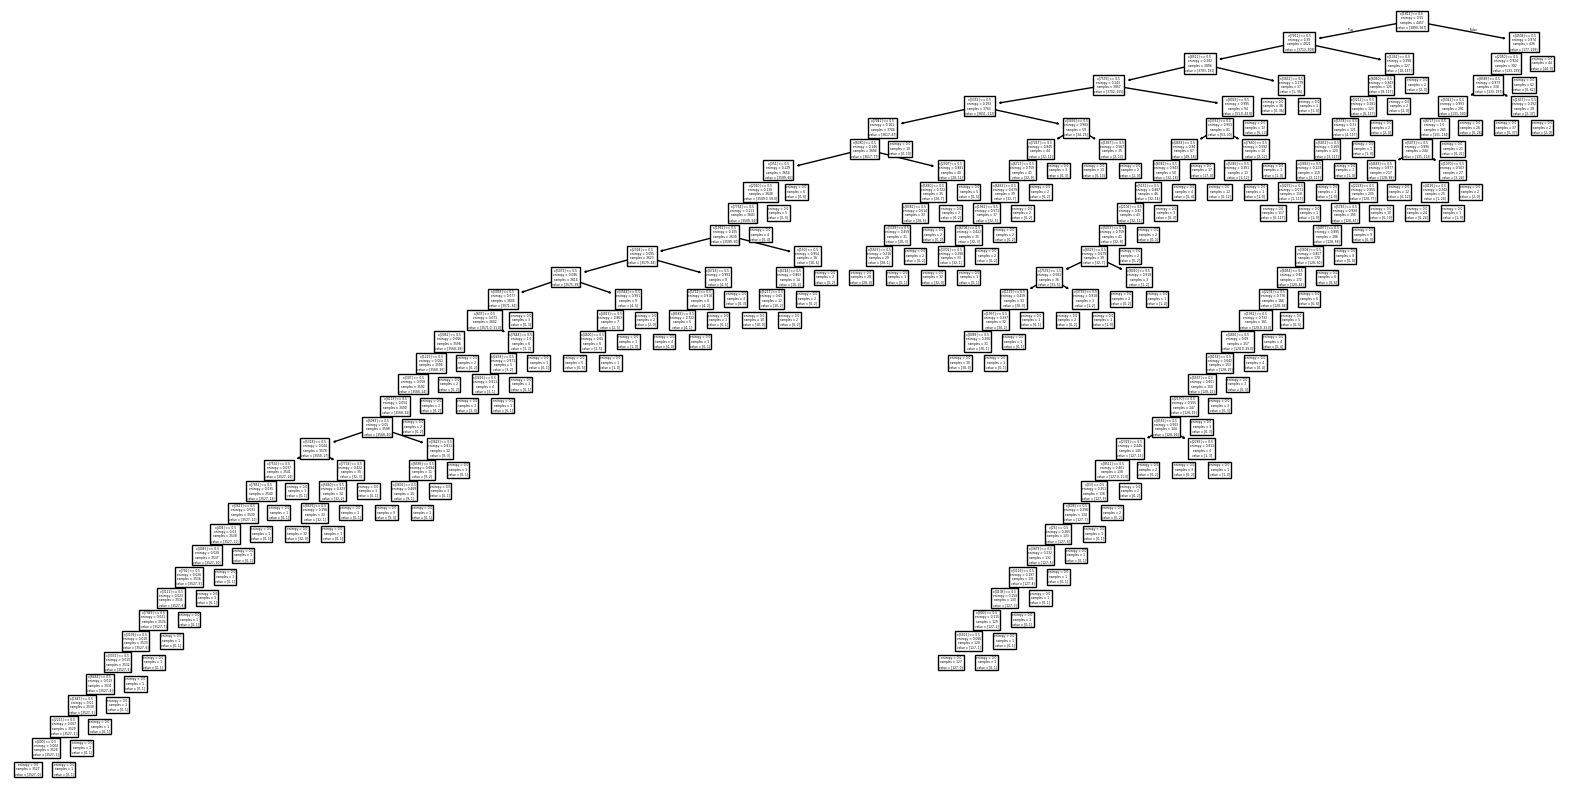

In [141]:
from sklearn.tree import plot_tree
plt.figure(figsize = (20,10))
plot_tree(dfc)
plt.savefig('tree1.jpg')
plt.show()

In [139]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

,priors,None
,var_smoothing,1e-09


In [140]:
gnb.score(X_train, Y_train)*100,lr.score(X_test, Y_test)*100

(94.99663450751626, 97.21973094170404)

In [150]:
lis = [('LogisticRegression',LogisticRegression()),('DecisionTreeClassifier',DecisionTreeClassifier()),('GaussianNB',GaussianNB())]

In [151]:
vc = VotingClassifier(lis)
vc.fit(X_train, Y_train)

,estimators,"[('LogisticRegression', ...), ('DecisionTreeClassifier', ...), ...]"
,voting,'hard'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True


In [153]:
vc.score(X_train, Y_train)*100,vc.score(X_test, Y_test)*100

(100.0, 97.75784753363229)

In [154]:
x_pred = vc.predict(X_test)

In [156]:
confusion_matrix(Y_test, x_pred)

array([[935,   0],
       [ 25, 155]])

In [159]:
cmf = confusion_matrix(Y_test,x_pred)

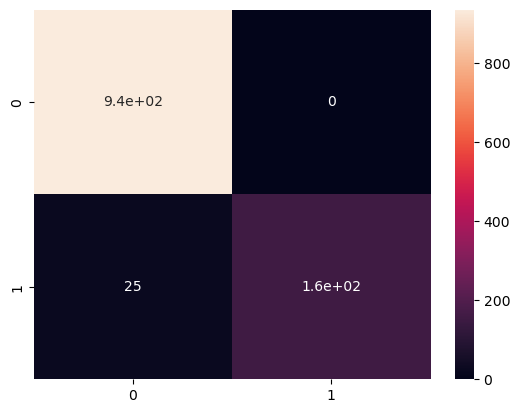

In [160]:
sns.heatmap(cmf, annot =True)
plt.show()